/home/iai/user/adams0/myconda/bigenv/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


32561
480
488
480


<ipython-input-1-81202fb97665>:330: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-1-81202fb97665>:337: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


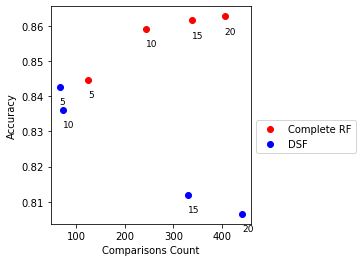

In [1]:

# set dataset name and run, the output results file and plot are exported to the folder InferenceComparison/  
dataset='adult'

import csv,operator,sys,os
import numpy as np
import sklearn
import json
import FeatureGenerators.ReadData as ReadData
import time
from functools import reduce
import matplotlib.pyplot as plt

sys.path.append('arch-forest/data/adult/')
sys.path.append('arch-forest/data/bank/')
sys.path.append('arch-forest/data/wine-quality/')
sys.path.append('arch-forest/data/')
sys.path.append('arch-forest/code/')
import trainForest
import Tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score
import FeatureGenerators.DecisionSnippetFeatures




filesPath = "arch-forest/data/"
frequentTreesPath = "forests/rootedFrequentTrees/"
comparisonCountPath = "InferenceComparison/"

from FeatureGenerators.ReadData import readDataAdult,readWine, readWineTest

if (dataset == 'adult'):
    X_train,Y_train = ReadData.readDataAdult('train')
    X_test,Y_test = ReadData.readDataAdult('test')
if (dataset == 'spambase'):
    X_train,Y_train = ReadData.readDataSpambase('train')
    X_test,Y_test = ReadData.readDataSpambase('test')
if (dataset == 'wine-quality'):
        X_train,Y_train = ReadData.readWine()
        X_test,Y_test = ReadData.readWineTest()
if (dataset == 'letter'):
    X_train,Y_train = ReadData.readDataLetter('train')
    X_test,Y_test = ReadData.readDataLetter('test')    
print(len(X_train))

# Classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score
    
import FeatureGenerators.DecisionSnippetFeatures

results_list = []
time_list = []
rf_depth = 5
scoring_function = 'accuracy'
pattern_max_size=6
variant = 'NoLeafEdgesWithSplitValues'

countsList =[]

for rf_depth in (5,10,15,20):
    for frequency in range(2,26,1):
        for pruning in ['','_pruned_with_sigma_0_0','_pruned_with_sigma_0_1','_pruned_with_sigma_0_2','_pruned_with_sigma_0_3']:
    
            rootedFrequentTrees = "RF_"+str(rf_depth)+pruning+"_t"+str(frequency)
            f = open(frequentTreesPath+dataset+'/'+variant+'/leq'+str(pattern_max_size)+'/'+rootedFrequentTrees+'.json')
            frequentpatterns = json.load(f)
            f.close()

            dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:])) 

            fts = dsf.fit_transform(X_test,1)

            compareCount = 0
            for i in range(0,len(X_test)):
                for nodesNumber in fts[i]:
                    compareCount += nodesNumber


            print(round(compareCount/len(X_test),1))
            countsList.append('RF_'+str(rf_depth)+pruning+'_t'+str(frequency)+','+str(round(compareCount/len(X_test),1))+',\n')

#Complete

for rf_depth in (5,10,15,20):
    
    f = open(comparisonCountPath+'/'+dataset+'/'+'RF_'+str(rf_depth)+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:]))  

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test)))
    countsList.append('RF_'+str(rf_depth)+','+str(round(compareCount/len(X_test),1))+',\n')    
    


file= open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count.csv',"w")
for count in countsList:
    file.write(count)


file.close()
    

    

accuracy_list = []
accuracy_list_rf = []
count_list = []
size_list_rf = []
rf_list = []



with open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count'+'.csv') as count_file:
        count_reader = csv.reader(count_file, delimiter='\n')
        line_count = 1
        for row in count_reader:
            if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                count_list.append(rowStr[1])
            line_count +=1    

count_file.close()




for rf_depth in (5,10,15,20):
    
    f = open(comparisonCountPath+'/'+dataset+'/'+'RF_'+str(rf_depth)+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:]))  

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test)))
    countsList.append('RF_'+str(rf_depth)+','+str(round(compareCount/len(X_test),1))+',\n')    
    


file= open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count.csv',"w")
for count in countsList:
    file.write(count)


file.close()
    
    

accuracy_list = []
accuracy_list_rf = []
count_list = []
size_list_rf = []
rf_list = []



with open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count'+'.csv') as count_file:
        count_reader = csv.reader(count_file, delimiter='\n')
        #line_count = 1
        for row in count_reader:
            #if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                count_list.append(rowStr[1])
            #line_count +=1    

count_file.close()



for rf_depth in (5,10,15,20):
    
    with open(frequentTreesPath+'/'+dataset+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        line_count = 0
        for row in csv_reader:
            rowStr = str(row).split(',')
            if line_count < 120:
                accuracy_list.append(rowStr[1])
                rf_list.append('RF_'+str(rf_depth)+'_'+rowStr[0][2:])
                if (line_count == 5):
                    accuracy_list_rf.append(rowStr[4])
                line_count+=1
    csv_file.close()
    
print(len(rf_list))
print(len(count_list))
print(len(accuracy_list))
    
f= open(comparisonCountPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv',"w")
f.write('RF,comparisons Count,accuracy,\n')
for i in range(0,len(accuracy_list)):
        f.write(rf_list[i]+','+count_list[i]+','+accuracy_list[i]+',\n')
for depth in (5,10,15,20):
        f.write('RF_'+str(depth)+','+count_list[int(depth/5) +len(accuracy_list)-1]+','+accuracy_list_rf[int(depth/5) -1]+',\n')
f.close()


#print(len(accuracy_list))
#for i in range(0,len(count_list)):
#        print(rf_list[i]+'\n')


accuracy_list_dsf = []
count_list_dsf = []
accuracy_list = []
count_list = []


with open(comparisonCountPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        lineCount =1    
            
        for row in csv_reader:
                if (lineCount > 1 ):
                    rowStr = str(row).split(',')
                    if (lineCount > 481):
                        count_list.append(rowStr[1])
                        accuracy_list.append(rowStr[2])
                    else:
                        count_list_dsf.append(rowStr[1])
                        accuracy_list_dsf.append(rowStr[2])
                        
            
                    
                lineCount+=1
                
            
                
csv_file.close()



count = np.array(count_list, dtype=np.float32)
accuracy = np.array(accuracy_list, dtype=np.float32)

count_dsf = np.array(count_list_dsf, dtype=np.float32)
accuracy_dsf = np.array(accuracy_list_dsf, dtype=np.float32)

####
best_dsf_rf5 = 0
best_dsf_rf10 = 0
best_dsf_rf15 = 0
best_dsf_rf20 = 0
best_dsf_rf5_index = 0
best_dsf_rf10_index = 0
best_dsf_rf15_index = 0
best_dsf_rf20_index = 0

for i in range(0,len(count_dsf)):
    if (i < 120):
        if (accuracy_dsf[i] > best_dsf_rf5):
            best_dsf_rf5 = accuracy_dsf[i]
            best_dsf_rf5_index = i
    if (i >= 120 and i < 240):
        if (accuracy_dsf[i] > best_dsf_rf10):
            best_dsf_rf10 = accuracy_dsf[i]
            best_dsf_rf10_index = i    
    if (i >= 240 and i < 360):
        if (accuracy_dsf[i] > best_dsf_rf15):
            best_dsf_rf15 = accuracy_dsf[i]
            best_dsf_rf15_index = i
    if (i >= 360 and i < 480):
        if (accuracy_dsf[i] > best_dsf_rf20):
            best_dsf_rf20 = accuracy_dsf[i]
            best_dsf_rf20_index = i        
    

accuracy_dsf_best = []
accuracy_dsf_best.append(best_dsf_rf5)
accuracy_dsf_best.append(best_dsf_rf10)
accuracy_dsf_best.append(best_dsf_rf15)
accuracy_dsf_best.append(best_dsf_rf20)
count_dsf_best = []
count_dsf_best.append(count_dsf[best_dsf_rf5_index])
count_dsf_best.append(count_dsf[best_dsf_rf10_index])
count_dsf_best.append(count_dsf[best_dsf_rf15_index])
count_dsf_best.append(count_dsf[best_dsf_rf20_index])

for i in range(0,len(count)):
    plt.scatter(count[i], accuracy[i], c='red')
    plt.text(count[i], accuracy[i]-0.005, (i+1)*5, fontsize=9)
    plt.scatter(count_dsf_best[i], accuracy_dsf_best[i], c='blue')
    plt.text(count_dsf_best[i], accuracy_dsf_best[i]-0.005, (i+1)*5, fontsize=9)


#####
#plt.scatter(count, accuracy, c='lightblue')
#plt.scatter(count_dsf, accuracy_dsf, c='red')


plt.xlabel('Comparisons Count')
plt.ylabel('Accuracy')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.60, box.height])
plt.legend(['Complete RF','DSF'],bbox_to_anchor=(1.0, 0.5), loc='upper left')
plt.text(27, 0.77, '')
fig = plt.gcf()
fig.savefig(comparisonCountPath+'comparisons_count_'+dataset+'_'+variant+'_'+scoring_function+'.png', dpi=150)
fig.show()        
